Case 1 <function Case1 at 0x0000013A9DADBF28>
CASE 2 [-0.665898413008571*x1 + 0.455912515037513]
CASE3 -0.641082690247146*x1 - 5.57181875114983e-16*sqrt(-3.83486666203573e+27*x1**2 - 4.99510421701672e+30*x1 + 8.3317316461565e+30) + 2.09062736578341


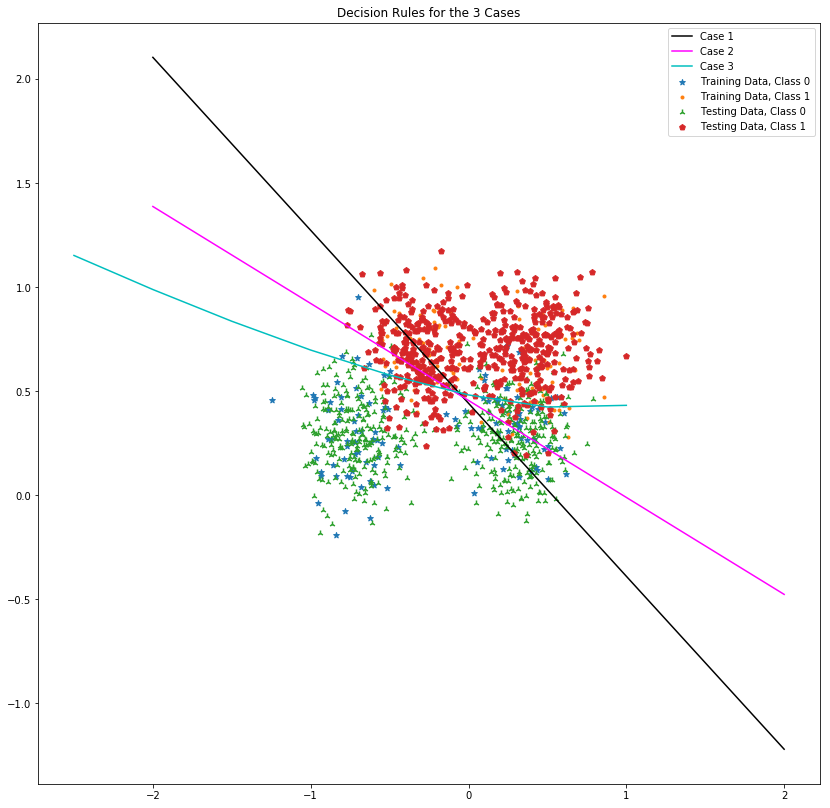

In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sympy as sym
import math 

#################LOADING DATA################################################
synth_train = pd.read_csv('synth.tr.txt',delim_whitespace = 1, header=None)
synth_train.columns = ['x1', 'x2', 'y']
tr0, tr1 = synth_train[synth_train['y']==0], synth_train[synth_train['y']==1]
#print('tr0', tr0)
#print('tr1', tr1)


synth_test = pd.read_csv('synth.te.txt',delim_whitespace = 1, header=None)
synth_test.columns = ['x1', 'x2', 'y']
te0, te1 = synth_test[synth_test['y']==0], synth_test[synth_test['y']==1]

#print(synth_test)
def gaussian_mle(synth):                                                                                                                                                                               
    mu = synth.mean()                                                                                                                                                                            
    var = (synth-mu).T @ (synth-mu) / synth.shape[0] 

    return mu, var

testMu0 = np.array([[gaussian_mle(te0)[0][0], gaussian_mle(te0)[0][1]]])
testMu1 = np.array([[gaussian_mle(te1)[0][0], gaussian_mle(te1)[0][1]]])
#print("testMu0", testMu0)
#print("testMu1", testMu1)

te0_x1σ, tr0_x2σ = te0.loc[:,'x1'].std(), te0.loc[:,'x2'].std()
te1_x1σ, te1_x2σ = te1.loc[:,'x1'].std(), te1.loc[:,'x2'].std()
#print("sig0", te0_x1σ, tr0_x2σ )
#print("sig1", te1_x1σ, te1_x2σ )

##############MAXIMUM LIKELIHOOD ESTIMATION###################################
def gaussian_mle(synth):                                                                                                                                                                               
    mu = synth.mean()                                                                                                                                                                            
    var = (synth-mu).T @ (synth-mu) / synth.shape[0] 

    return mu, var


tr0mu = np.array([[gaussian_mle(tr0)[0][0], gaussian_mle(tr0)[0][1]]])
gaussian_mle(tr0) #tr0Cov
tr0Cov = np.array([[0.274595, 0.011139],[0.011139, 0.035830]])
tr1mu = np.array([[gaussian_mle(tr1)[0][0], gaussian_mle(tr1)[0][1]]])
gaussian_mle(tr1) #tr1Cov 
tr1Cov = np.array([[0.15847, -0.015450],[-0.01545, 0.029719]])
#print("tr0mu",tr0mu)
#print("tr1mu",tr1mu)
#print("tr0Cov", tr0Cov)
#print("tr1Cov", tr1Cov)
tr0_x1σ, tr0_x2σ = tr0.loc[:,'x1'].std(), tr0.loc[:,'x2'].std()
tr1_x1σ, tr1_x2σ = tr1.loc[:,'x1'].std(), tr1.loc[:,'x2'].std()

#print(tr0_x2σ)


########################### CASE 1 ###########################################
x1, x2 = sym.Symbol('x1'), sym.Symbol('x2')
xar = np.array([x1,x2])

tr0mu, tr1mu = np.array([-0.221470237, 0.3257549406]), np.array([0.075954312, 0.682968913])

def Case1():
    Eq_1 = ((x1*tr0mu[0] - x1*tr1mu[0])/(-tr0mu[1] + tr1mu[1])) 
    Eq_2 = ((-tr0mu[0]**2 -tr0mu[1]**2  + tr1mu[0]**2 + tr1mu[1]**2)/ (-2*tr0mu[1] + 2*tr1mu[1]))
    CASE1 = Eq_1 + Eq_2
    return Case1

print("Case 1", Case1)


########################### CASE 2 ###########################################

prior = 0.5
Σ01av = ((tr0_x1σ + tr0_x2σ)/2)
Σ02av = ((tr1_x1σ + tr1_x2σ)/2)
tr0mu, tr1mu  = np.array([-0.221470237, 0.3257549406]), np.array([0.075954312, 0.682968913])
Σ = np.array([(Σ01av, 0), (0, Σ02av)]) 
#print(Σ)
Σinv = np.linalg.inv(Σ)
x1, x2 = sym.Symbol('x1'), sym.Symbol('x2')
xar = np.array([x1,x2])

def CASE2():
    Eq1 = np.dot(np.dot(Σinv,tr0mu),xar) + (np.dot(np.dot(Σinv,tr0mu), tr0mu) * (-1)*prior)
    Eq2 = np.dot(np.dot(Σinv,tr1mu),xar) + (np.dot(np.dot(Σinv,tr1mu), tr1mu) * (-1)*prior)
    This = Eq1 - Eq2
    CASE2 = sym.solve(This, x2)
    return CASE2
print("CASE 2", CASE2())
########################### CASE 3 ##########################################

x1, x2 = sym.Symbol('x1'), sym.Symbol('x2')
xar = np.array([x1,x2])
tr0C_inv, tr1C_inv = np.linalg.inv(tr0Cov), np.linalg.inv(tr1Cov)
det0, det1 = np.linalg.det(tr0Cov), np.linalg.det(tr1Cov)

def CASE3():
    Eq1 = (-0.5)*tr0C_inv 
    Eq1_1 = np.dot(np.dot(np.transpose(xar), Eq1), xar)
    Eq2 = np.dot(np.transpose(np.dot(tr0C_inv, tr0mu)), xar)
    Eq3 = np.dot(np.dot(np.transpose(tr0mu),tr0C_inv), tr0mu)
    Eq3_1 = np.log(det0)
    EqSum = ((Eq3 + Eq3_1) *(-1)*0.5) + Eq1_1 + Eq2
    GEq1 = (-0.5)*tr1C_inv
    GEq1_1 = np.dot(np.dot(np.transpose(xar), GEq1), xar)
    GEq2 = np.dot(np.transpose(np.dot(tr1C_inv, tr1mu)), xar)
    GEq3 = np.dot(np.dot(np.transpose(tr1mu),tr1C_inv), tr1mu)
    GEq3_1 = np.log(det1)
    GEqSum = ((GEq3 + GEq3_1) *(-1)*0.5) + GEq1_1 + GEq2
    EQF = EqSum - GEqSum
    CASE3 = sym.solve(EQF, x2)
    return CASE3[0]
print("CASE3", CASE3())

####################### PLOTS ##############################################
x = np.linspace(-2, 2, 1000)
plt.figure(figsize=(14, 14))
plt.plot(x, (-0.830986*x) + 0.442254,'-k', label="Case 1")  # solid
plt.plot(x, (-0.465898413008571*x) + 0.455912515037513,'-r', color= 'magenta', label="Case 2")
plt.scatter(tr0['x1'], tr0['x2'], label="Training Data, Class 0", marker = '*')
plt.scatter(tr1['x1'], tr1['x2'], label="Training Data, Class 1", marker = '.')
plt.scatter(te0['x1'], te0['x2'], label="Testing Data, Class 0", marker = '2')
plt.scatter(te1['x1'],te1['x2'],  label="Testing Data, Class 1", marker = 'p')
x = np.arange(-2.5, 1.2, 0.5)
y=[]
for c in x:
    i = CASE3().subs(x1,c)
    y.append(i)
plt.plot(x,y,'-c', label= "Case 3")
plt.title("Decision Rules for the 3 Cases")
plt.legend()
plt.show()
#mu0_11 = mu0tr[0]
#mu0_12 = 

0.48000000000000004
0.72
0.715


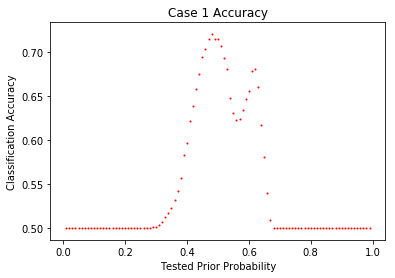

In [135]:
#EVALUATIONS
s_test = pd.read_csv('synth.te.txt',delim_whitespace = 1, header=None)
s_test.columns = ['x1', 'x2', 'y']
#print(s_test)
########################### CASE 1 ########################################
def g1_0(x, y, w):
    xar = np.array([x,y])
    A=(-1/(2*tr0_x1σ))
    B= np.dot(xar, np.transpose(xar))  
    C=-2*np.dot(tr0mu, np.transpose(xar))
    D=np.dot(tr0mu, np.transpose(tr0mu)).item()
    Eq1 = A * B - C + D + math.log(w)  
    return Eq1

def g1_1(x,y,w):
    xar = np.array([x,y])
    A=(-1/(2*tr1_x1σ))
    B= np.dot(xar, np.transpose(xar))  
    C=-2*np.dot(tr1mu, np.transpose(xar))
    D=np.dot(tr0mu, np.transpose(tr1mu)).item()
    Eq2 = A * B - C + D + math.log(1-w)  
    return Eq2



def Classify(s_test,w):
    classified = 0
    unclassified = 0
    class0 = 0
    class1 = 0
    for index,row in s_test.iterrows():
        x1, x2 = row['x1'], row['x2'] 
        g0_call, g1_call = g1_0(x1,x2,w), g1_1(x1,x2,w)
        
        if g0_call >= g1_call:
            classification=0
            class0 = class0 + 1
            
        else:
            classification=1
            class1 = class1 + 1
            
        if classification==row['y']:
            classified=classified+1
            
        else:
            unclassified=unclassified+1

    return classified/s_test.shape[0]

def PriorProb_test(Ps,s_test):
    acuryz =[]
    
    for i in range(len(Ps)):
        w=Ps[i]
        
        accuracy = Classify(s_test, w)
        acuryz.append(accuracy)
    acuryz = np.array(acuryz)
    return acuryz

Ps = np.arange(0.01, 1.0, 0.01)
a = Ps
b = np.array([[PriorProb_test(Ps, s_test)]])



fig, pl = plt.subplots()
pl.scatter(a,b,s=0.99, color= 'Red')
pl.set(title="Case 1 Accuracy")
pl.set(xlabel="Tested Prior Probability")
pl.set(ylabel="Classification Accuracy")
print(a[np.argmax(b)])
print(np.max(b))
print(Classify(s_test, 0.5))
   
plt.show()


    

    
    
    








Optimal Prior 0.46
Optmal Accuracy 0.759


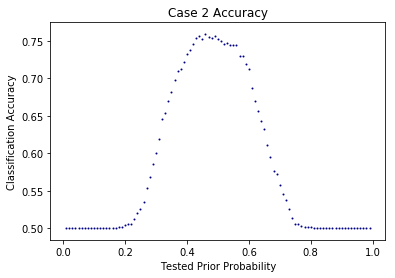

In [136]:
########################### CASE 2 ######################################


def g2_0(x, y, w):
    xar = np.array([x,y])
    Eq1 = np.dot(np.dot(Σinv,tr0mu),xar) + (np.dot(np.dot(Σinv,tr0mu), tr0mu) * (-1)*prior) + math.log(w)
    return Eq1

def g2_1(x, y, w):
    xar = np.array([x,y])
    Eq2 = np.dot(np.dot(Σinv,tr1mu),xar) + (np.dot(np.dot(Σinv,tr1mu), tr1mu) * (-1)*prior) + math.log(1-w)
    return Eq2

def Classify(s_test,w):
    classified = 0
    unclassified = 0
    class0 = 0
    class1 = 0
    for index,row in s_test.iterrows():
        x1=row['x1']
        x2=row['x2']
        g0_call, g1_call = g2_0(x1,x2,w), g2_1(x1,x2,w)
        
        if g0_call >= g1_call:
            classification=0
            class0 = class0 + 1
        else:
            classification=1
            class1 = class1 + 1
        if classification==row['y']:
            classified=classified+1
            
        else:
            unclassified=unclassified+1

    return classified/s_test.shape[0]

def PriorProb_test(Ps,s_test):
    acuryz =[]
    for i in range(len(Ps)):
        w=Ps[i]
        accuracy = Classify(s_test, w)
        acuryz.append(accuracy)
    acuryz = np.array(acuryz)

    return acuryz

Ps = np.arange(0.01, 1.0, 0.01)
l = Ws
m = PriorProb_test(Ps, s_test)



fig, pl = plt.subplots()
pl.scatter(l,m,s=0.99, color= 'Navy')
pl.set(title="Case 2 Accuracy")
pl.set(xlabel="Tested Prior Probability")
pl.set(ylabel="Classification Accuracy")
pl.set
print("Optimal Prior", l[np.argmax(m)])
print("Optmal Accuracy", np.max(m))




G3_0 0.37905923296618493
0.46
0.9
0.898


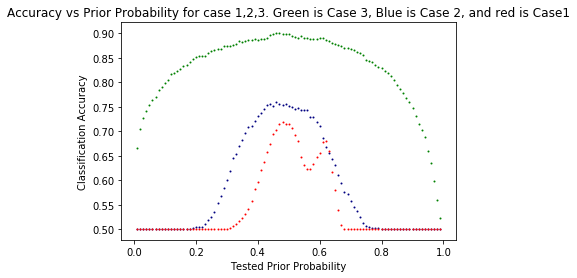

<Figure size 1008x1008 with 0 Axes>

In [138]:
########################### CASE 3######################################
def g3_0(x, y, w):
    xar = np.array([x,y])
    Eq1 = -0.5*tr0C_inv 
    Eq1_1 = np.dot(np.dot(np.transpose(xar), Eq1), xar)
    Eq2 = np.dot(np.transpose(np.dot(tr0C_inv, tr0mu)), xar)
    Eq3 = np.dot(np.dot(np.transpose(tr0mu),tr0C_inv), tr0mu)
    Eq3_1 = np.log(det0)
    G0Log = math.log(w)
    EqSum = (Eq3 + Eq3_1) * -0.5 + Eq1_1 + Eq2 + G0Log
    return EqSum
print("G3_0",g3_0(.5,.5,.5))

def g3_1(x, y, w):
    xar = np.array([x,y])
    GEq1 = (-0.5)*tr1C_inv
    GEq1_1 = np.dot(np.dot(np.transpose(xar), GEq1), xar)
    GEq2 = np.dot(np.transpose(np.dot(tr1C_inv, tr1mu)), xar)
    GEq3 = np.dot(np.dot(np.transpose(tr1mu),tr1C_inv), tr1mu)
    GEq3_1 = np.log(det1)
    G1Log = math.log(1-w)                      
    GEqSum = (GEq3 + GEq3_1) *(-0.5) + GEq1_1 + GEq2 + G1Log
    return GEqSum


def Classify(s_test,w):
    classified = 0
    unclassified = 0
    class0 = 0
    class1 = 0
    
    for index,row in s_test.iterrows():
        x1=row['x1']
        x2=row['x2']
        g0_call, g1_call = g3_0(x1,x2,w), g3_1(x1,x2,w)
        
        if g0_call >= g1_call:
            classification=0
            class0 = class0 + 1
            
        else:
            classification=1
            class1 = class1 + 1
            
        if classification==row['y']:
            classified=classified+1
            
        else:
            unclassified=unclassified+1

    return classified/s_test.shape[0]

def PriorProb_test(Ps,s_test):
    acuryz =[]
    for i in range(len(Ps)):
        w=Ps[i]
        accuracy = Classify(s_test, w)
        acuryz.append(accuracy)
    acuryz = np.array(acuryz)

   
    return acuryz


Ps = np.arange(0.01, 1.0, 0.01)
o = Ps
p = PriorProb_test(Ps, s_test)



fig, pl = plt.subplots()
plt.figure(figsize=(14, 14))
pl.scatter(o,p,s=0.99, color= 'Green')
pl.scatter(l,m,s=0.99, color= 'Navy')
pl.scatter(a,b,s=0.99, color= 'Red')
pl.set(title="Accuracy vs Prior Probability for case 1,2,3. Green is Case 3, Blue is Case 2, and red is Case1")
pl.set(xlabel="Tested Prior Probability")
pl.set(ylabel="Classification Accuracy")
pl.set
print(o[np.argmax(p)])
print(np.max(p))
print(Classify(s_test, 0.5))



In [134]:
################## One/Two Modal Analysis#######################
def g0(x, y, w):
    mu1 = np.array([-0.75, 0.2])
    mu2 = np.array([0.3, 0.3])
    S1 = np.array([[0.25, 0], [0, 0.3]])
    S2 = np.array([[0.1, 0], [0, 0.1]]);
    A1 = 0.5
    A2 = 1 - A1
    d = 2
    S1_inv = np.linalg.inv(S1)
    S2_inv = np.linalg.inv(S2)
    xar = np.array([x,y])
    
    A = (2*math.pi)**(d/2)
    B = A1/((np.linalg.det(S1))**(1/2)*A )
    C = np.exp((-1/2)*(np.dot(np.dot(np.transpose((xar - mu1)),S1_inv),(xar-mu1))))
    D = B*C
    
    E = (2*math.pi)**(d/2)
    F = A2/((np.linalg.det(S2))**(1/2)*A )
    H = np.exp((-1/2)*(np.dot(np.dot(np.transpose((xar-mu2)),S2_inv),(xar-mu2))))
    I = F*H
    Eq1 = I+D
    
    return Eq1



def g1(x, y, w):
    mu1 = np.array([-0.31, 0.75])
    mu2 = np.array([0.51, 0.76])
    S1 = np.array([[0.25, 0], [0, 0.03]])
    S2 = np.array([[0.1, 0], [0, 0.1]])
    A1 = 0.5
    A2 = 1 - A1
    d = 2
    S1_inv = np.linalg.inv(S1)
    S2_inv = np.linalg.inv(S2)
    xar = np.array([x,y])
    
    A = (2*math.pi)**(d/2)
    B = A1/((np.linalg.det(S1))**(1/2)*A )
    C = np.exp((-1/2)*(np.dot(np.dot(np.transpose((xar - mu1)),S1_inv),(xar-mu1))))
    D = B*C
    
    E = (2*math.pi)**(d/2)
    F = A2/((np.linalg.det(S2))**(1/2)*A )
    H = np.exp((-1/2)*(np.dot(np.dot(np.transpose((xar-mu2)),S2_inv),(xar-mu2))))
    I = F*H
    Eq2 = I+D
    return Eq2
    
    
def Classify(s_test,w):
    classified = 0
    unclassified = 0
    class0 = 0
    class1 = 0
    
    for index,row in s_test.iterrows():
        x1=row['x1']
        x2=row['x2']
        g0_call, g1_call = g0(x1,x2,w), g1(x1,x2,w)
        
        if g0_call >= g1_call:
            classification=0
            class0 = class0 + 1
            
        else:
            classification=1
            class1 = class1 + 1
            
        if classification==row['y']:
            classified=classified+1
            
        else:
            unclassified=unclassified+1

    return classified/s_test.shape[0]

def PriorProb_test(Ps,s_test):
    acuryz =[]
    for i in range(len(Ps)):
        w=Ps[i]
        accuracy = Classify(s_test, w)
        acuryz.append(accuracy)
    acuryz = np.array(acuryz)

   
    return acuryz


Ps = np.arange(0.01, 1.0, 0.01)
q = Ws
r = PriorProb_test(Ps, s_test)

print(q[np.argmax(r)])
print(np.max(r))
print(Classify(s_test, 0.5))
    
plt.show()


0.01
0.879
0.879
